In [58]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from data.Data_loader import GravitationalWave_datastrain as GW_DS, GravitationalWave_datastrain_New as GW_DS_NEW

(65536,)


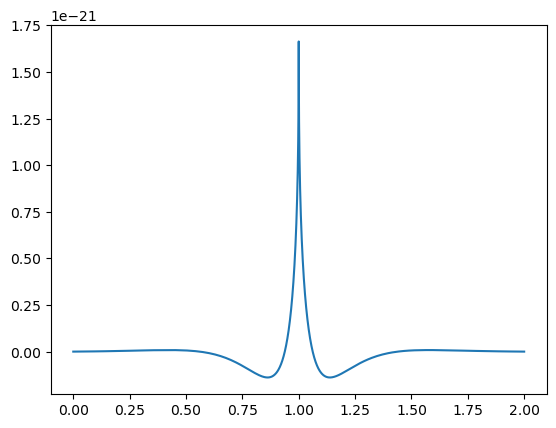

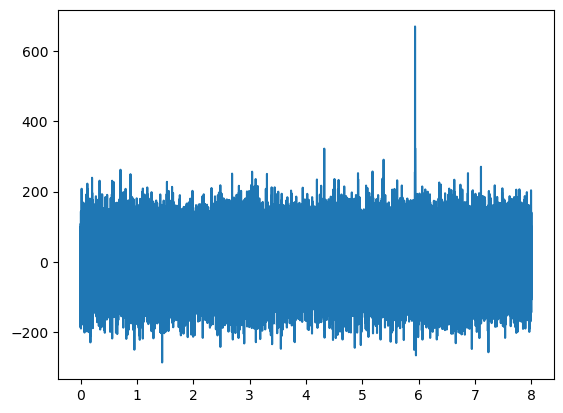

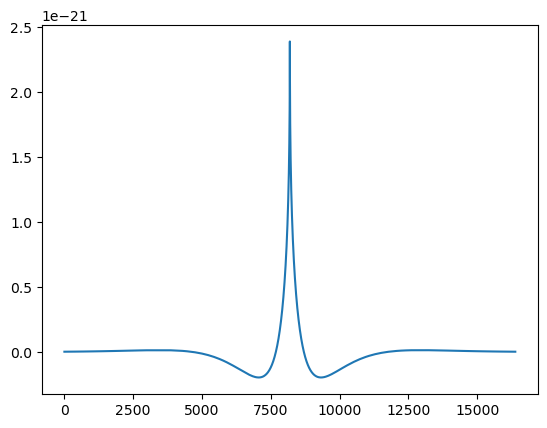

In [59]:
path_old = '/data/gravwav/lopezm/ML_projects/Projects_2022/Project_2/Data'
data_old = GW_DS(path)

path = '/data/gravwav/lopezm/ML_projects/Projects_2022/Project_2/Data_new'
data = GW_DS_NEW(path)

ID = 245
x1= np.load(path+f'/Waveforms/wf{ID}.npy.html')
x2= np.load(path+f'/Waveforms/wf1.npy.html')
x3= np.load(path+f'/Waveforms/wf50.npy.html')
x4= np.load(path+f'/Waveforms/wf6500.npy.html')
y = np.load(path+f'/Injections/Whitened/injection_wf{ID}.npy.html')
print(y.T[3].shape)
plt.plot(x1.T[0],x1.T[1])
plt.show()
plt.plot(y.T[3]-y.T[3][0],y.T[0])
plt.show()
plt.plot((x3.T[1]))

3


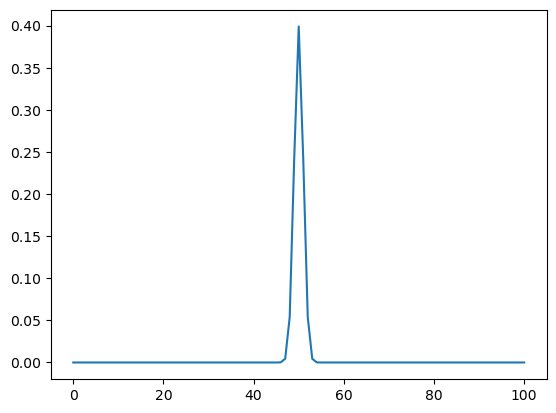

In [81]:
from neural.CNN import CNN as CNN

#Dataset, Truth_values = data.make_dataset(50)
channels = 3
def gaus(bins, sigma, mu):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))
gaus_array1 = np.repeat([[gaus(np.linspace(-50,50,101),1,0)]],channels,axis=0)
plt.plot(gaus_array1[0,0])
plt.plot()
gaus_array2 = np.repeat([gaus(np.linspace(-50,50,101),0.5,0)],channels,axis=0)
kernels = torch.tensor(np.array(gaus_array1))
print(len(kernels))
Net = CNN(channels, len(kernels[0]), len(kernels))
Net.set_kernel(kernels)



In [61]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.MSELoss()#CrossEntropyLoss()
optimizer = optim.SGD(Net.parameters(), lr=0.001, momentum=0.009)

In [13]:
"""
batch_size = 1
# Split the dataset into training, validation, and testing sets
train_size = int(0.7 * len(data))
val_size = int(0.15 * len(data))
test_size = len(data) - train_size - val_size

train_matrices, val_matrices, test_matrices = torch.utils.data.random_split(data, [train_size, val_size, test_size])


# Create a data loader for each dataset
train_data_loader = torch.utils.data.DataLoader(train_matrices, batch_size=batch_size, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_matrices, batch_size=batch_size, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_matrices, batch_size=batch_size, shuffle=True)
"""
np.repeat([[0,1]],10,axis=0)

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [7]:
trainsize = 2000 
trainset = data.make_dataset(trainsize, data_bounds=[0,12000])

testsize = 500
valset = data.make_dataset(testsize, data_bounds=[12000,13500])
testset = data.make_dataset(testsize, data_bounds=[13500,15000])

batch_size = 32
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

In [73]:
trainsize = 2
trainset = data.make_dataset(trainsize, data_bounds=[0,12000])
print(trainset[1])

tensor([[0, 1],
        [1, 0],
        [1, 0],
        [0, 1]])


In [7]:
#from torch.utils.data import DataLoader
channels = 3

running_loss = 0.0
num_iterations = 100
num_batch = 1

num_epochs = 10

for epoch in range(num_epochs):  # loop over the dataset multiple times
    Dataset, labels =  data.make_dataset(num_iterations*num_batch)
    for i in range(num_iterations*2):
        #print(i)
        # get the inputs; data is a list of [inputs, labels]
        inputs = np.array(Dataset)[range(channels)][:,i,:]
        #inputs = np.swapaxes(inputs,0,1)
        
        inputs = torch.tensor(np.array([inputs]))
        #print('shape input:',inputs.shape)
        
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        #print('shape kernel:',Net.conv1.weight.shape)
        outputs = Net(inputs)
        label = np.zeros(2)
        label[int(labels[i])] = 1
        label = torch.tensor(np.array([label])).type(torch.float32)
        #print(label)
        loss = criterion(outputs, label)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % int(num_iterations/2)==int(num_iterations/2-1):    # print every mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 14.347
[1,   100] loss: 13.816
[1,   150] loss: 15.341
[1,   200] loss: 13.752
[2,    50] loss: 15.466
[2,   100] loss: 13.113
[2,   150] loss: 13.534
[2,   200] loss: 13.602
[3,    50] loss: 12.704
[3,   100] loss: 13.351
[3,   150] loss: 13.177
[3,   200] loss: 14.058
[4,    50] loss: 13.566
[4,   100] loss: 14.442
[4,   150] loss: 14.870
[4,   200] loss: 13.942
[5,    50] loss: 14.203
[5,   100] loss: 13.507
[5,   150] loss: 14.526
[5,   200] loss: 14.731
[6,    50] loss: 13.249
[6,   100] loss: 13.337
[6,   150] loss: 14.041
[6,   200] loss: 14.520
[7,    50] loss: 12.774
[7,   100] loss: 14.898
[7,   150] loss: 12.812
[7,   200] loss: 14.499
[8,    50] loss: 13.974
[8,   100] loss: 13.272
[8,   150] loss: 13.052
[8,   200] loss: 12.495
[9,    50] loss: 13.541
[9,   100] loss: 14.208
[9,   150] loss: 14.362
[9,   200] loss: 13.259
[10,    50] loss: 13.533
[10,   100] loss: 12.750
[10,   150] loss: 13.732
[10,   200] loss: 13.800
Finished Training


In [30]:
sample= 145
data_ = Dataset[0:3][:,sample,:]
print(data_.shape)
data_ = np.array(data_)
Prediction = Net(torch.tensor([data_]))
label = ['Background', 'Signal']
True_value = label[int(labels[sample])]
print(f'the network guesses sample signal {sample} to be {Prediction[0,0]**2*100:.2f}%Background and {Prediction[0,1]**2*100:.2f}%Signal, the sample was {True_value}.')

torch.Size([3, 65536])
the network guesses sample signal 145 to be 6.72%Background and 93.28%Signal, the sample was Signal.


In [26]:
Dataset_, labels_ =  data.make_dataset(1)

data_ = Dataset_[0:3][:,0,:]
print(data_.shape)
data_ = np.array(data_)
Prediction = Net(torch.tensor([data_]))
label = ['Background', 'Signal']
True_value = label[int(labels_[0])]
print(f'the network guesses sample signal {0} to be {Prediction[0,0]**2*100:.2f}%Background and {Prediction[0,1]**2*100:.2f}%Signal, the sample was {True_value}.')

torch.Size([3, 65536])
the network guesses sample signal 0 to be 46.67%Background and 53.33%Signal, the sample was Signal.


7813


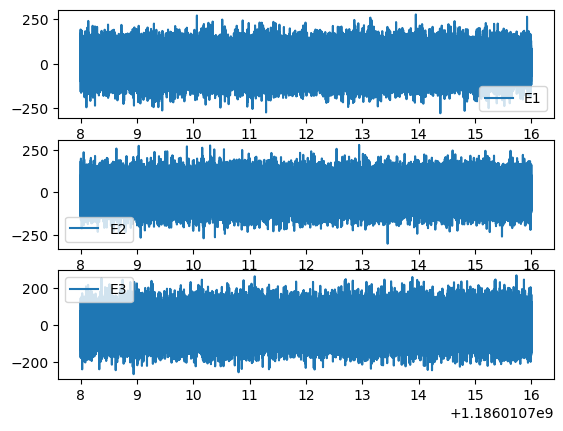

the network guesses sample signal 7813 to be 34.11%Background and 65.89%Signal, is Background True.


In [62]:
ID = np.random.randint(0,10000)
print(ID)
data = GW_DS(path)
data.background = True
injection = data[ID]
fig, ax = plt.subplots(3,1)
for i in [1,2,3]:
    ax[i-1].plot(injection[3],injection[i-1], label=f'E{i}')
    ax[i-1].legend()
plt.show()

data_ = injection[0:3]
data_ = np.array(data_)
Prediction = Net(torch.tensor([data_]))

print(f'the network guesses sample signal {ID} to be {Prediction[0,0]**2*100:.2f}%Background and {Prediction[0,1]**2*100:.2f}%Signal, is Background {data.background}.')

In [4]:
np.random.seed(123)
size = 500

random_draw = np.random.randint(0,10000, size)
shuffle_array = np.arange(size*2)
np.random.shuffle(shuffle_array)
#print(random_draw,'\n', shuffle_array)

data.background = False
injections = np.array(data[list(random_draw)])
#print(injections[2,0])
data.background = True
backgrounds = np.array(data[list(random_draw)])
#print(backgrounds.shape)

dataset = np.concatenate([injections,backgrounds],1)
#print(dataset.shape)
dataset = dataset[:, shuffle_array,:]
#print(dataset[2,38])

truth_values = np.concatenate([np.ones(size),np.zeros(size)])[shuffle_array]
#print(truth_values)

Dataset = torch.tensor(dataset)
#print(Dataset)

In [34]:
np.random.seed(123)

Dataset, Truth_values = data.make_dataset(5)
print('shape input:',Dataset.shape)
print(Dataset, '\n',Truth_values)

shape input: torch.Size([4, 10, 65536])
tensor([[[ 1.0312e+02, -6.0629e+01, -7.8495e+01,  ...,  7.5249e+01,
          -1.2357e+02,  1.0342e+02],
         [-9.3494e+01,  9.0621e+00,  1.9853e+01,  ..., -1.8895e+01,
          -1.2494e+01,  6.6337e+01],
         [-1.6752e+01, -1.1075e+02,  2.3348e+01,  ...,  5.4517e+01,
           3.6843e+01,  1.0189e+02],
         ...,
         [-6.4671e+01,  4.5703e+01,  5.9825e+01,  ..., -2.8678e+01,
           5.0992e+00, -7.7122e+01],
         [-1.0001e+02, -9.6294e+01,  1.1074e+02,  ...,  2.5199e+01,
          -5.7247e+01,  8.0531e+01],
         [-1.4554e+02,  7.1781e+01,  3.2626e+01,  ...,  1.0989e+02,
           4.9365e+01,  2.3398e+00]],

        [[ 1.5545e+00,  3.6028e+01, -6.6521e+01,  ..., -4.8303e+01,
           1.7303e+01,  8.7141e+01],
         [ 1.0667e+02,  2.4572e+01,  8.5763e+01,  ..., -1.5188e+02,
           1.2731e+01,  6.0243e+01],
         [-5.4062e+01, -3.8654e+00, -6.7480e+01,  ...,  9.3622e+01,
           2.8729e+01,  1.0704e+02],

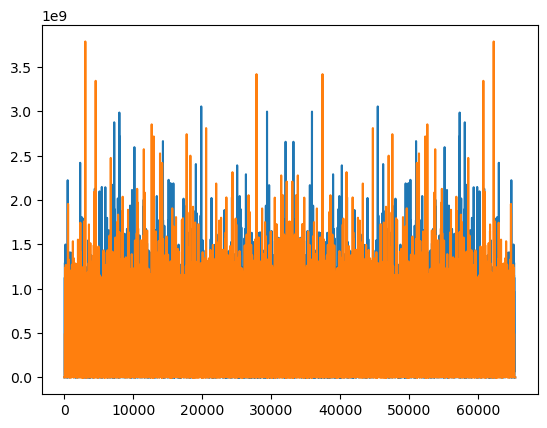

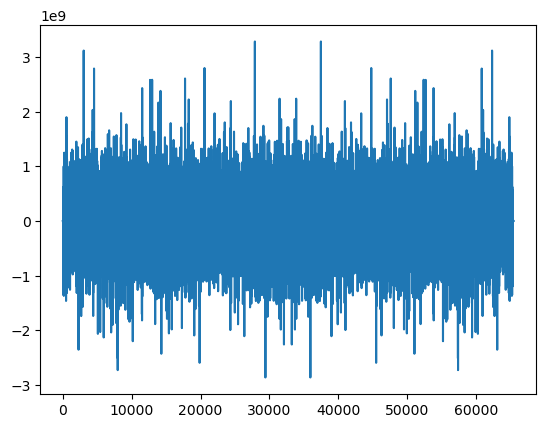

In [6]:
ID=234

data.background=False

x= data[ID][0]
xfft = np.fft.fft(x)
plt.plot(np.abs(xfft[100::])**2)

data.background=True

x= data[ID][0]
xfft1 = np.fft.fft(x)
plt.plot(np.abs(xfft1[100::])**2)
plt.show()

plt.plot(np.abs(xfft1[100::])**2-np.abs(xfft[100::])**2)

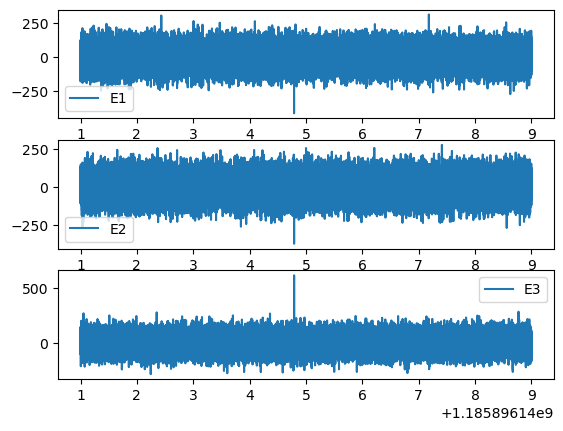

In [7]:
drawID = 343
fig, ax = plt.subplots(3,1)
for i in [1,2,3]:
    ax[i-1].plot(injections[3][drawID],injections[i-1][drawID], label=f'E{i}')
    ax[i-1].legend()


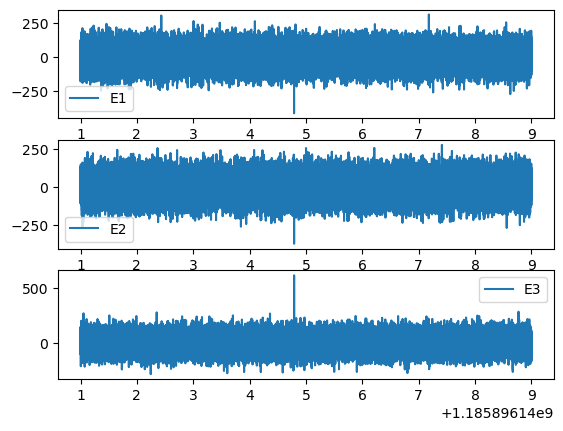

In [8]:
eventID = int(random_draw[drawID])
data.background = False
fig, ax = plt.subplots(3,1)
for i in [1,2,3]:
    ax[i-1].plot(data[eventID][3],data[eventID][i-1], label=f'E{i}')
    ax[i-1].legend()

In [9]:
import numpy as np
x = np.arange(225)

y=np.reshape(x,(5,3,15))
print(y)

transformed = y.transpose(1,2,0) 
print(transformed)

E1,E2,E3 = transformed
print(E1.T)


[[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14]
  [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29]
  [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44]]

 [[ 45  46  47  48  49  50  51  52  53  54  55  56  57  58  59]
  [ 60  61  62  63  64  65  66  67  68  69  70  71  72  73  74]
  [ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89]]

 [[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104]
  [105 106 107 108 109 110 111 112 113 114 115 116 117 118 119]
  [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134]]

 [[135 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
  [150 151 152 153 154 155 156 157 158 159 160 161 162 163 164]
  [165 166 167 168 169 170 171 172 173 174 175 176 177 178 179]]

 [[180 181 182 183 184 185 186 187 188 189 190 191 192 193 194]
  [195 196 197 198 199 200 201 202 203 204 205 206 207 208 209]
  [210 211 212 213 214 215 216 217 218 219 220 221 222 223 224]]]
[[[  0  45  90 135 180]
  [  1